In [1]:

# Instalasi library yang diperlukan (jika belum terinstal)
!pip install scikit-image matplotlib opencv-python numpy pillow

import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, img_as_ubyte
import cv2
from PIL import Image
from google.colab import files
import io as io_lib

ModuleNotFoundError: No module named 'google'

Silakan upload gambar kain katun putih Anda:


Saving kp_01.jpg to kp_01 (2).jpg
Gambar berhasil diupload: kp_01 (2).jpg
Dimensi gambar: (4624, 3468, 3)
Menghitung fitur contrast...
Menghitung fitur dissimilarity...
Menghitung fitur homogeneity...
Menghitung fitur ASM...
Menghitung fitur energy...
Menghitung fitur correlation...


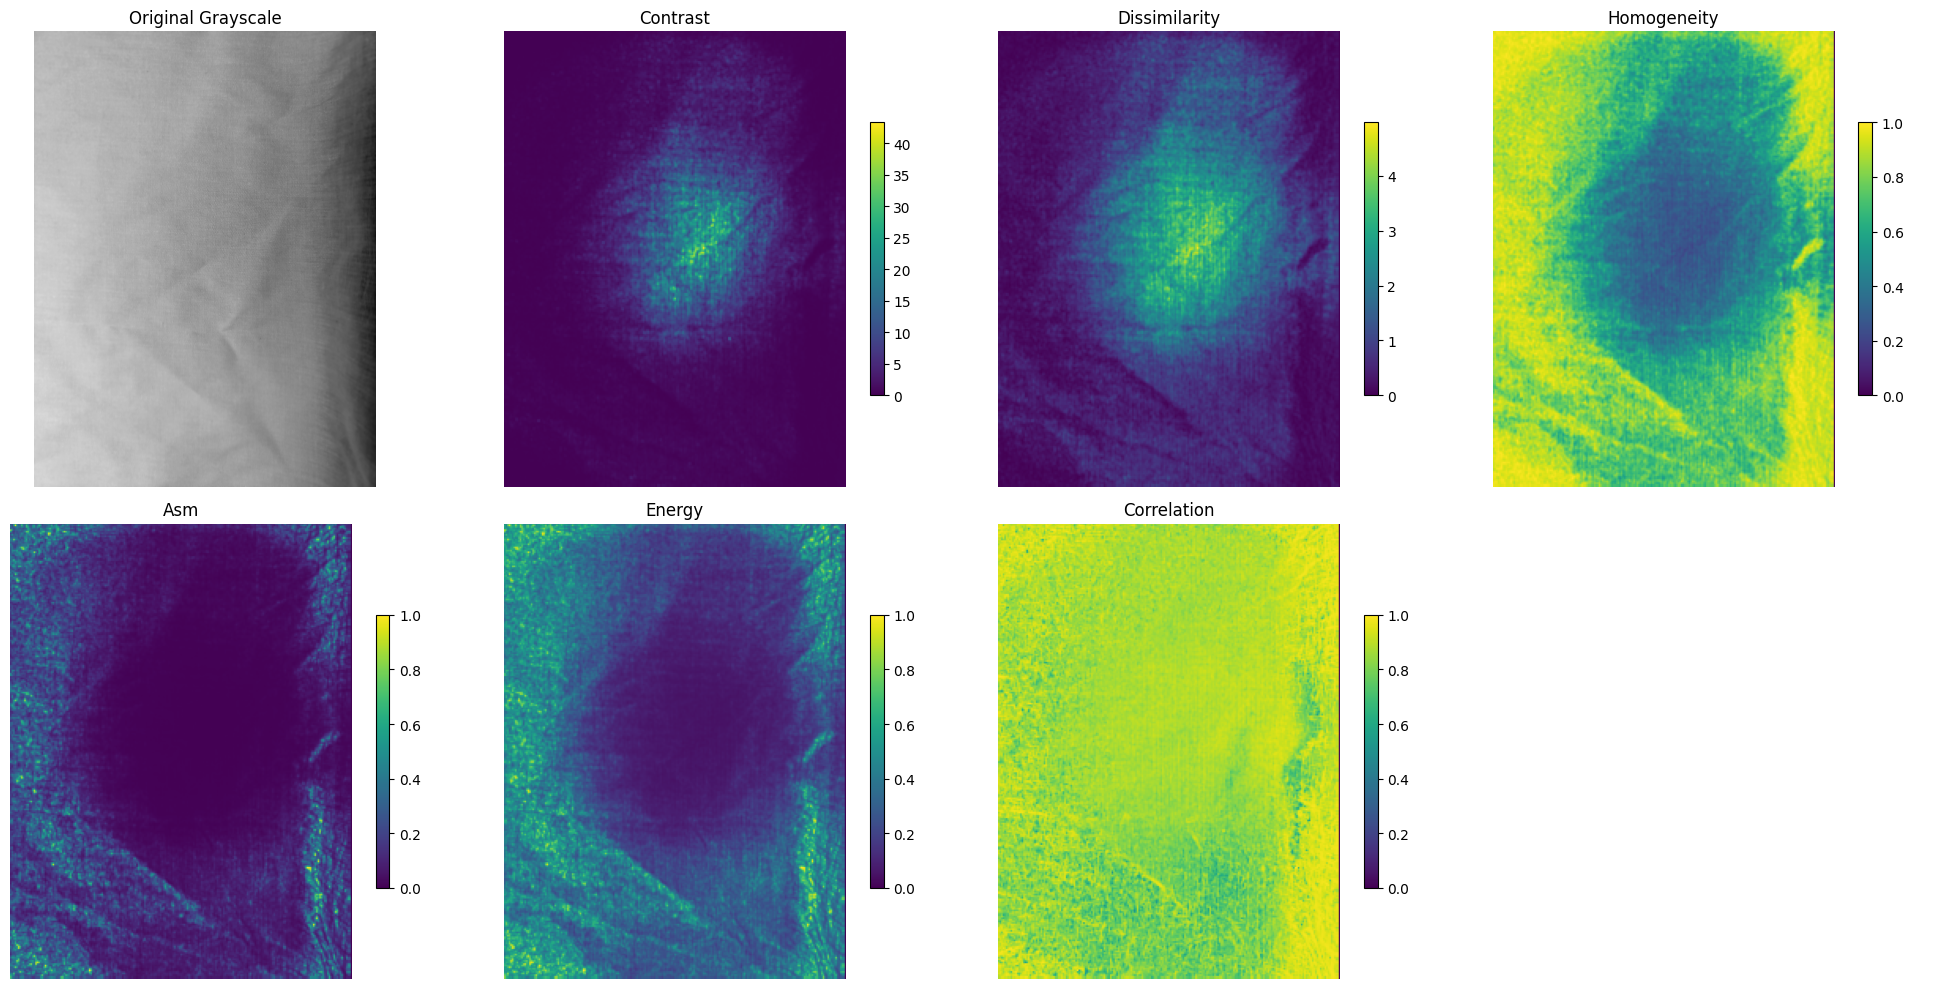

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.feature import graycomatrix, graycoprops
from skimage.util import img_as_ubyte
from PIL import Image
from google.colab import files
import io as io_lib

# Fungsi: Hitung fitur GLCM per blok
def compute_local_glcm_feature(img_gray, prop='contrast', window_size=32, step=16):
    h, w = img_gray.shape
    feature_map = np.zeros((h, w))

    for i in range(0, h - window_size + 1, step):
        for j in range(0, w - window_size + 1, step):
            patch = img_gray[i:i+window_size, j:j+window_size]
            glcm = graycomatrix(patch, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
            value = graycoprops(glcm, prop)[0, 0]
            feature_map[i:i+window_size, j:j+window_size] = value

    return feature_map

# Fungsi: Tampilkan semua fitur GLCM lokal
def plot_glcm_local_features(img, window_size=32, step=16):
    if len(img.shape) > 2:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img

    img_gray = img_as_ubyte(img_gray)

    props = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    feature_maps = {}

    for prop in props:
        print(f"Menghitung fitur {prop}...")
        feature_maps[prop] = compute_local_glcm_feature(img_gray, prop=prop, window_size=window_size, step=step)

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    axes[0, 0].imshow(img_gray, cmap='gray')
    axes[0, 0].set_title('Original Grayscale')
    axes[0, 0].axis('off')

    for idx, (prop, fmap) in enumerate(feature_maps.items()):
        row = (idx + 1) // 4
        col = (idx + 1) % 4
        ax = axes[row, col]
        im = ax.imshow(fmap, cmap='viridis')
        ax.set_title(prop.capitalize())
        ax.axis('off')
        plt.colorbar(im, ax=ax, shrink=0.6)

    if len(props) < 7:
        axes[1, 3].axis('off')

    plt.tight_layout()
    plt.savefig('fitur_glcm_lokal.png', dpi=300)
    plt.show()

# Upload gambar dari lokal
print("Silakan upload gambar kain katun putih Anda:")
uploaded = files.upload()

# Ambil nama file dan buka sebagai array
file_name = list(uploaded.keys())[0]
print(f"Gambar berhasil diupload: {file_name}")

img_bytes = uploaded[file_name]
pil_img = Image.open(io_lib.BytesIO(img_bytes)).convert('RGB')  # pastikan RGB
img = np.array(pil_img)

print(f"Dimensi gambar: {img.shape}")

# Tampilkan fitur GLCM lokal
plot_glcm_local_features(img)


Silakan upload gambar kain katun putih Anda:


Saving pp_01.jpg to pp_01.jpg
Gambar berhasil diupload: pp_01.jpg
Dimensi gambar: (4624, 3468, 3)
Menghitung fitur contrast...
Menghitung fitur dissimilarity...
Menghitung fitur homogeneity...
Menghitung fitur ASM...
Menghitung fitur energy...
Menghitung fitur correlation...


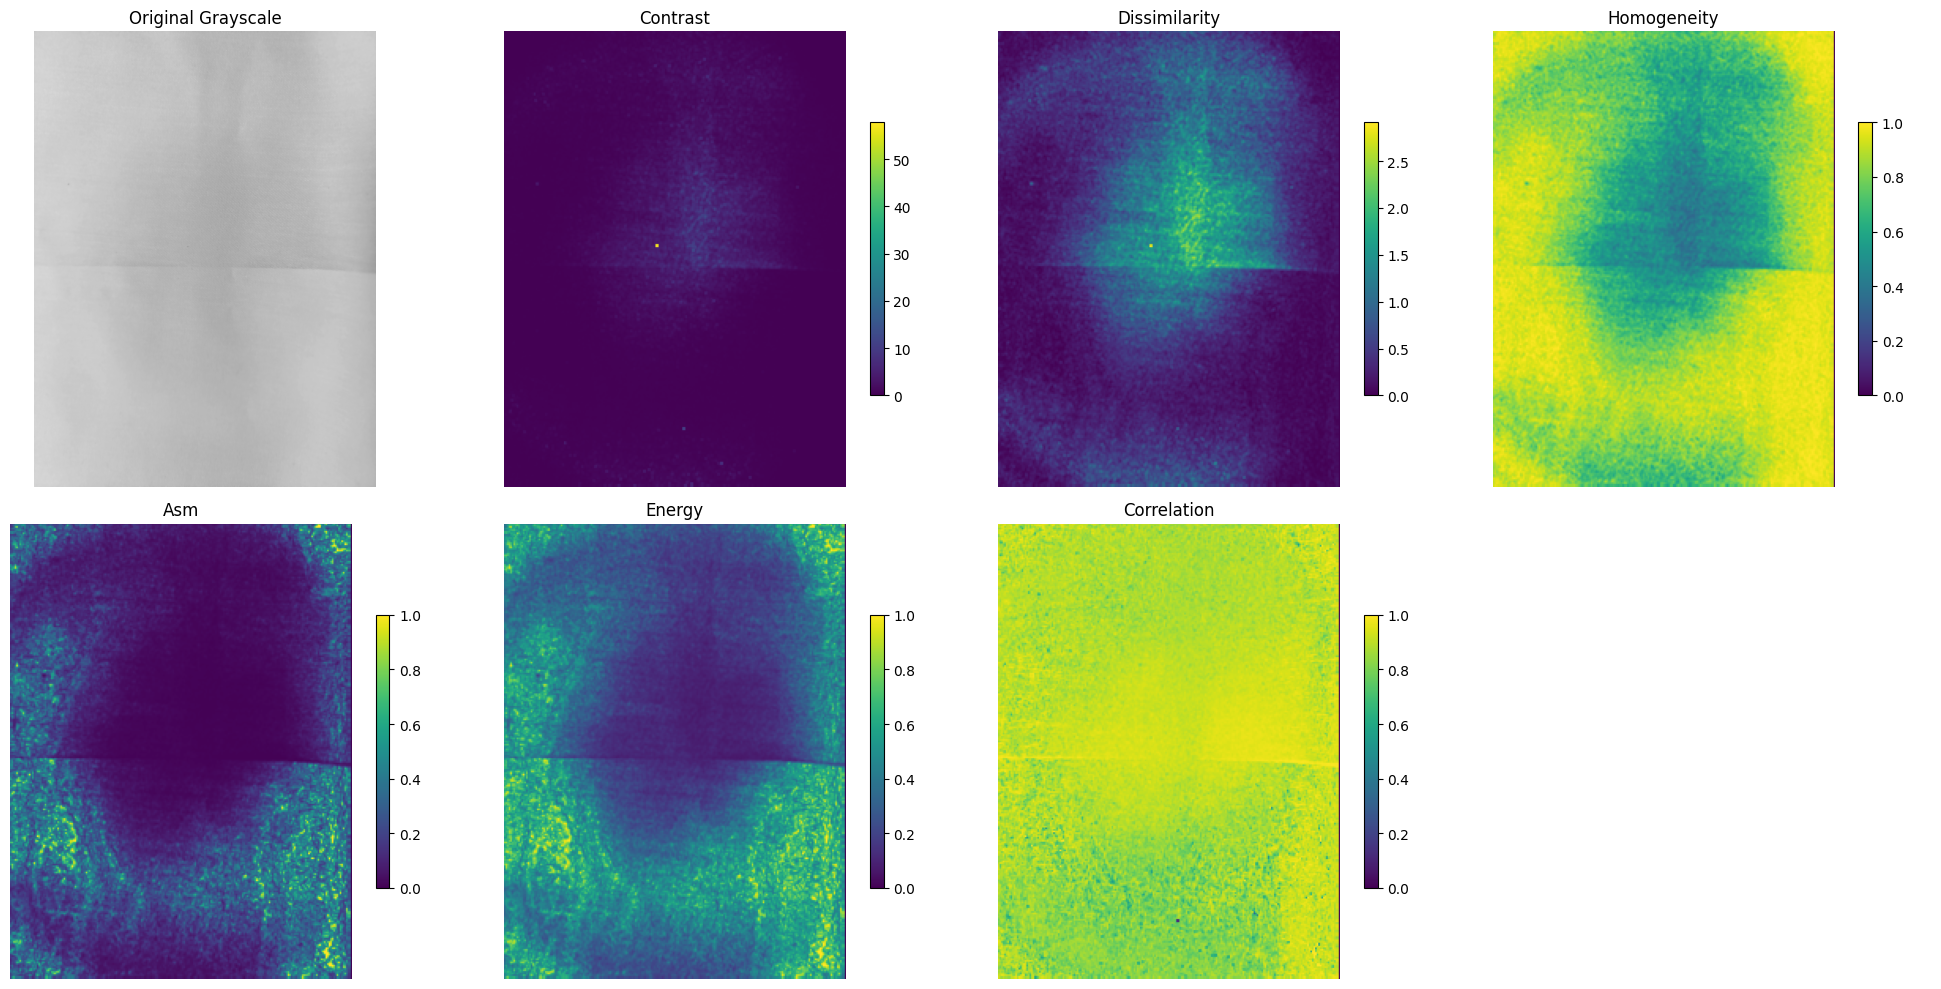

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.feature import graycomatrix, graycoprops
from skimage.util import img_as_ubyte
from PIL import Image
from google.colab import files
import io as io_lib

# Fungsi: Hitung fitur GLCM per blok
def compute_local_glcm_feature(img_gray, prop='contrast', window_size=32, step=16):
    h, w = img_gray.shape
    feature_map = np.zeros((h, w))

    for i in range(0, h - window_size + 1, step):
        for j in range(0, w - window_size + 1, step):
            patch = img_gray[i:i+window_size, j:j+window_size]
            glcm = graycomatrix(patch, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
            value = graycoprops(glcm, prop)[0, 0]
            feature_map[i:i+window_size, j:j+window_size] = value

    return feature_map

# Fungsi: Tampilkan semua fitur GLCM lokal
def plot_glcm_local_features(img, window_size=32, step=16):
    if len(img.shape) > 2:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img

    img_gray = img_as_ubyte(img_gray)

    props = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    feature_maps = {}

    for prop in props:
        print(f"Menghitung fitur {prop}...")
        feature_maps[prop] = compute_local_glcm_feature(img_gray, prop=prop, window_size=window_size, step=step)

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    axes[0, 0].imshow(img_gray, cmap='gray')
    axes[0, 0].set_title('Original Grayscale')
    axes[0, 0].axis('off')

    for idx, (prop, fmap) in enumerate(feature_maps.items()):
        row = (idx + 1) // 4
        col = (idx + 1) % 4
        ax = axes[row, col]
        im = ax.imshow(fmap, cmap='viridis')
        ax.set_title(prop.capitalize())
        ax.axis('off')
        plt.colorbar(im, ax=ax, shrink=0.6)

    if len(props) < 7:
        axes[1, 3].axis('off')

    plt.tight_layout()
    plt.savefig('fitur_glcm_lokal.png', dpi=300)
    plt.show()

# Upload gambar dari lokal
print("Silakan upload gambar kain katun putih Anda:")
uploaded = files.upload()

# Ambil nama file dan buka sebagai array
file_name = list(uploaded.keys())[0]
print(f"Gambar berhasil diupload: {file_name}")

img_bytes = uploaded[file_name]
pil_img = Image.open(io_lib.BytesIO(img_bytes)).convert('RGB')  # pastikan RGB
img = np.array(pil_img)

print(f"Dimensi gambar: {img.shape}")

# Tampilkan fitur GLCM lokal
plot_glcm_local_features(img)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.feature import graycomatrix, graycoprops
from skimage.util import img_as_ubyte
from PIL import Image
import io as io_lib

# Fungsi: Hitung fitur GLCM per blok
def compute_local_glcm_feature(img_gray, prop='contrast', window_size=32, step=16):
    h, w = img_gray.shape
    feature_map = np.zeros((h, w))

    for i in range(0, h - window_size + 1, step):
        for j in range(0, w - window_size + 1, step):
            patch = img_gray[i:i+window_size, j:j+window_size]
            glcm = graycomatrix(patch, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
            value = graycoprops(glcm, prop)[0, 0]
            feature_map[i:i+window_size, j:j+window_size] = value

    return feature_map

# Fungsi: Tampilkan semua fitur GLCM lokal
def plot_glcm_local_features(img, window_size=32, step=16):
    if len(img.shape) > 2:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img

    img_gray = img_as_ubyte(img_gray)

    props = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    feature_maps = {}

    for prop in props:
        print(f"Menghitung fitur {prop}...")
        feature_maps[prop] = compute_local_glcm_feature(img_gray, prop=prop, window_size=window_size, step=step)

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    axes[0, 0].imshow(img_gray, cmap='gray')
    axes[0, 0].set_title('Original Grayscale')
    axes[0, 0].axis('off')

    for idx, (prop, fmap) in enumerate(feature_maps.items()):
        row = (idx + 1) // 4
        col = (idx + 1) % 4
        ax = axes[row, col]
        im = ax.imshow(fmap, cmap='viridis')
        ax.set_title(prop.capitalize())
        ax.axis('off')
        plt.colorbar(im, ax=ax, shrink=0.6)

    if len(props) < 7:
        axes[1, 3].axis('off')

    plt.tight_layout()
    plt.savefig('fitur_glcm_lokal.png', dpi=300)
    plt.show()

# Upload gambar dari lokal
print("Silakan upload gambar kain katun putih Anda:")
uploaded = files.upload()

# Ambil nama file dan buka sebagai array
file_name = list(uploaded.keys())[0]
print(f"Gambar berhasil diupload: {file_name}")

img_bytes = uploaded[file_name]
pil_img = Image.open(io_lib.BytesIO(img_bytes)).convert('RGB')  # pastikan RGB
img = np.array(pil_img)

print(f"Dimensi gambar: {img.shape}")

# Tampilkan fitur GLCM lokal
plot_glcm_local_features(img)

Silakan upload gambar kain katun putih Anda:


NameError: name 'files' is not defined